## 🎓 Student Performance Indicator

#### 🔄 Life Cycle of a Machine Learning Project →

- Understanding the Problem
- Data Collection
- Data Checks
- Exploratory Data Analysis (EDA)
- Data Preprocessing
- Model Training
- Best Model Selection


#### 1️⃣ Problem Definition

- 💡 How much does a student's performance depend on the various background factors they come from?


#### 2. Data Collection

- Data Source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
- The Dataset consists of 1000 rows and 8 columns!!


### Start by importing libraries


In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/stud.csv')

In [88]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Data Checks
- Missing Values 
- Duplicates
- Datatypes
- Unique Values In Each Columns
- Statistics
- Categorical Values in Each Column


In [89]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [92]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Feature Distribution

In [21]:
numerical_features = [features for features in df.columns if df[features].dtype!='O']
categorical_features = [features for features in df.columns if df[features].dtype=='O']
print(numerical_features)
print(categorical_features)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### Adding Average and Total score column 

In [18]:
df['total score'] = df.apply(lambda x: x['math_score'] + x['reading_score'] + x['writing_score'], axis=1)
df['average'] = df['total score'].div(3).round(2)

In [ ]:
df.drop(['math_score', 'reading_score', 'writing_score'],axis =1,inplace = True)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,total score,average
0,female,group B,bachelor's degree,standard,none,218,72.67
1,female,group C,some college,standard,completed,247,82.33
2,female,group B,master's degree,standard,none,278,92.67
3,male,group A,associate's degree,free/reduced,none,148,49.33
4,male,group C,some college,standard,none,229,76.33


## Data Visualisation

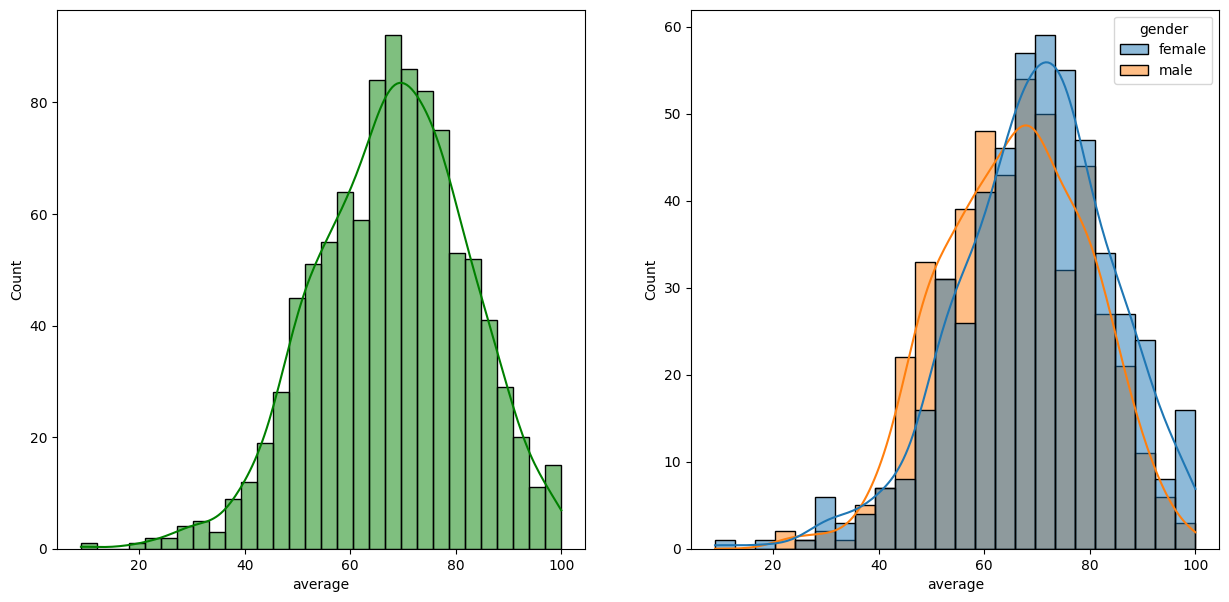

In [99]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue ='gender')
plt.show()

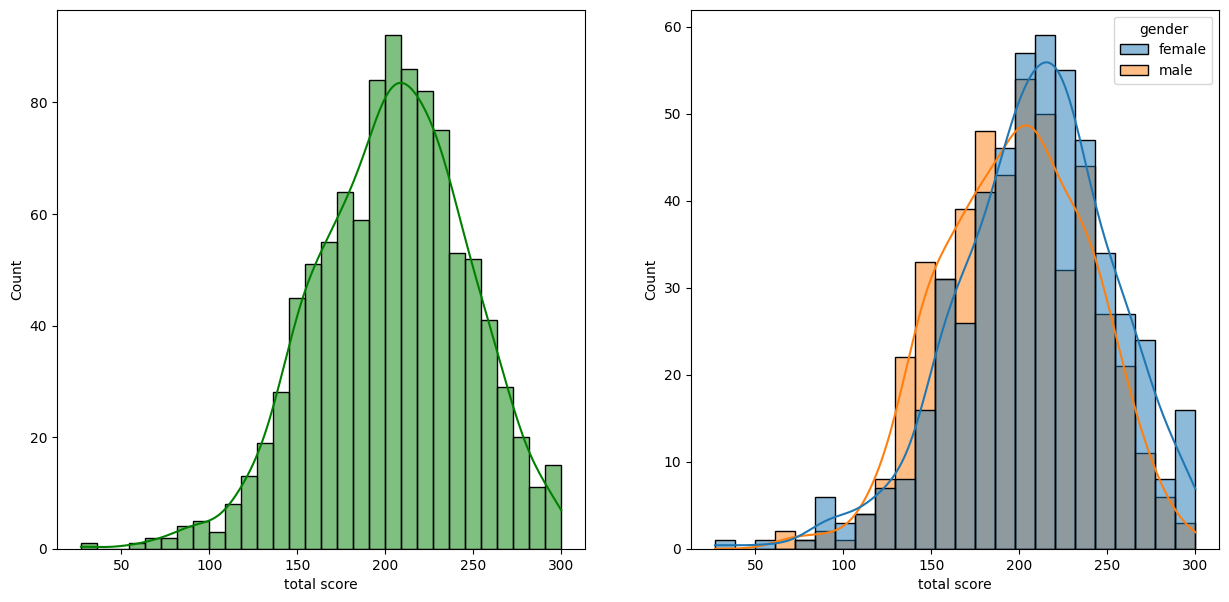

In [96]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

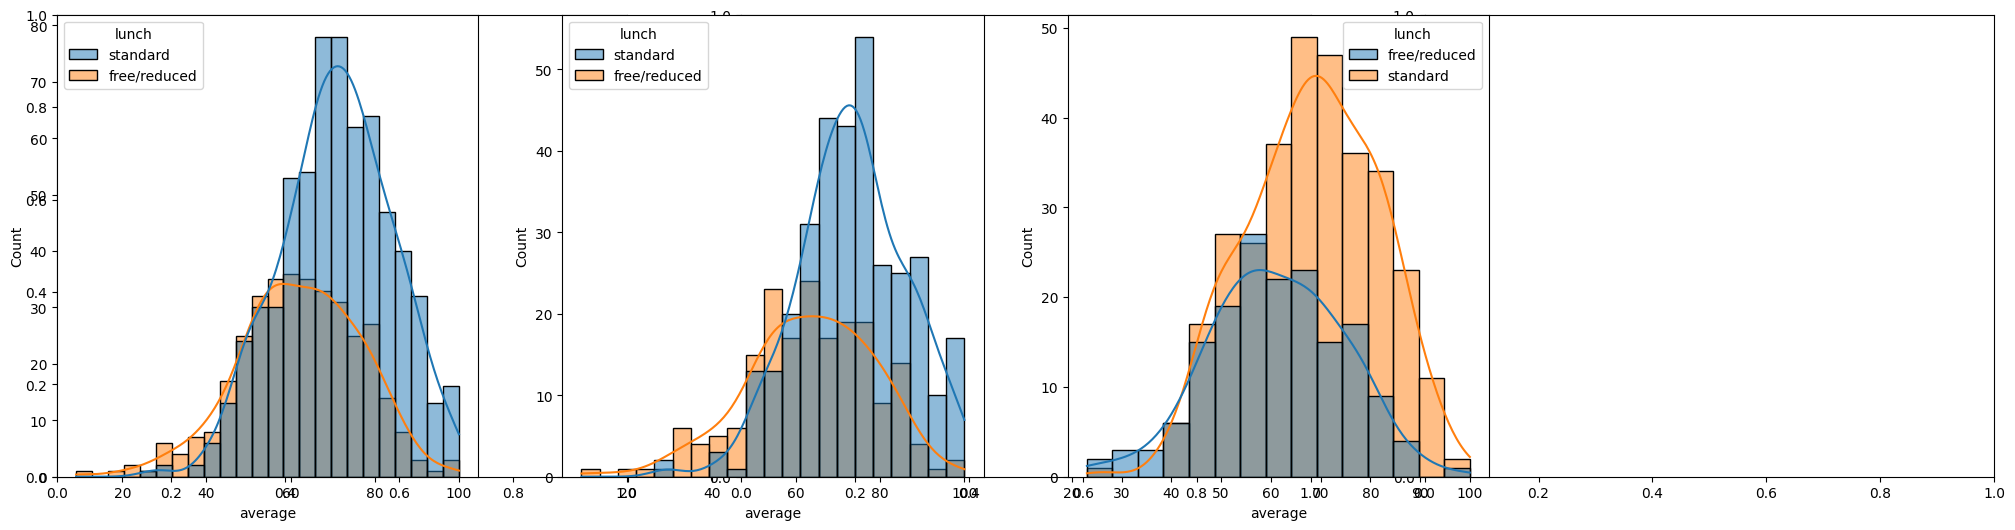

In [114]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

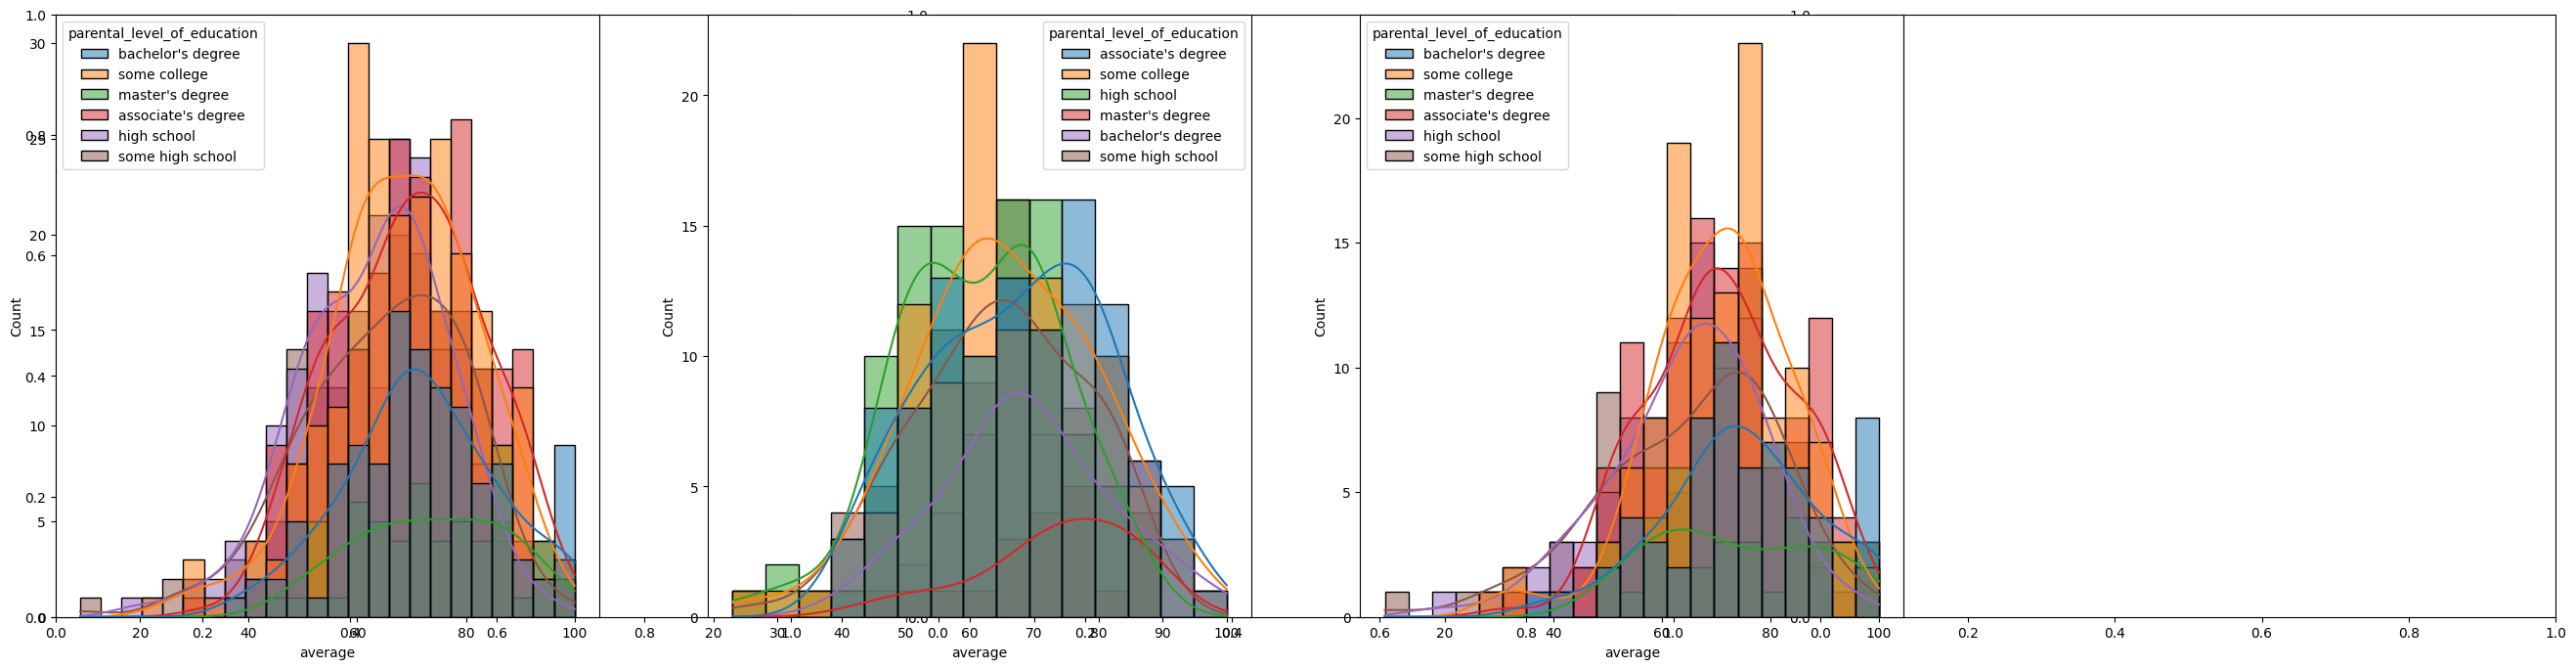

In [115]:
plt.subplots(1,3,figsize=(33,8))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()